<a href="https://colab.research.google.com/github/fannijako/ML_course_hws/blob/main/ML_hazi_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Epoch 1/100
62/62 [==============================] - 15s 130ms/step - loss: 0.0086
Epoch 2/100
62/62 [==============================] - 8s 125ms/step - loss: 0.0029
Epoch 3/100
62/62 [==============================] - 8s 122ms/step - loss: 0.0027
Epoch 4/100
62/62 [==============================] - 8s 122ms/step - loss: 0.0027
Epoch 5/100
62/62 [==============================] - 9s 150ms/step - loss: 0.0022
Epoch 6/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0022
Epoch 7/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0022
Epoch 8/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0019
Epoch 10/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0018
Epoch 11/100
62/62 [==============================] - 8s 124ms/step - loss: 0.0017
Epoch 12/100
62/62 [==============================] - 8s 126ms/step - loss: 0.0014
Epoch 13/100

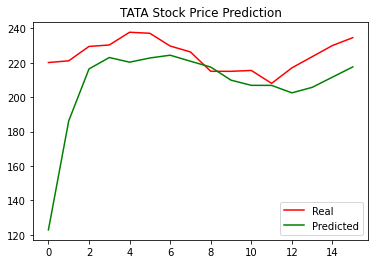

In [2]:
# training set
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

# test set
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

# format change in training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Layer specification
model = Sequential()

# LSTM and Dropout Layer 1
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# LSTM and Dropout Layer 2
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# LSTM and Dropout Layer 3
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# LSTM and Dropout Layer 4
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Dense Layer
model.add(Dense(units=1))

# compile and fit
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

#merge training and test set
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

# format change in training set
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#prediction
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# prediction plot
plt.plot(real_stock_price, color = 'red', label = 'Real')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted')
plt.title('TATA Stock Price Prediction')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()